In [1]:
from bokeh.plotting import output_notebook, figure, show,ColumnDataSource
from bokeh.models import HoverTool, tools
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord


from bokeh.models.ranges import Range1d

import aplpy

output_notebook()


Loading BokehJS ...

In [2]:
radeg = 265.1754471
decdeg = -53.6720120

f275 = [ ]
f336 = [ ]
f606 = [ ]

ra = []
radeglist = []
member = [ ]

dec = []
decdeglist = []

color = []
size=[]
closestarsindex = []
ind = []
name = []


cat = 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6397_multi_v1_catalog-meth3.txt'

with open(cat,'r') as file:
    for index, line in enumerate(file):
    #for line in file:
        line = line.strip()
        if not line:  # line is blank
            continue
        if line.startswith("#"):  # comment line
            continue
        b = line.split()
        #if float(b[2]) != -99.9999 and float(b[8]) != -99.9999 and float(b[32]) > 90.:
        if float(b[2]) != -99.9999 and float(b[8]) != -99.9999:

            ind.append(index+1)
            name.append(b[35].strip('R'))

            f275.append(float(b[2]))
            f336.append(float(b[8]))
            f606.append(float(b[20]))
            membertemp = float(b[32])
            member.append(membertemp)

            c1 = SkyCoord(float(b[33])*u.deg, float(b[34])*u.deg, frame='fk5')
            rahmsstr = c1.ra.to_string(u.hour,sep=':')
            decdmsstr = c1.dec.to_string(u.degree, alwayssign=True,sep=':')
            ra.append(rahmsstr)
            radeglist.append(c1.ra.deg)
            decdeglist.append(c1.dec.deg)

            dec.append(decdmsstr)
            #Center MUSe and separation
            #265.1734892, -53.6711580
            c2 = SkyCoord(radeg*u.deg, decdeg*u.deg, frame='fk5')
            sep = c1.separation(c2)

            if sep.deg < 0.008:
                closestarsindex.append(index)
                color.append('red')
                size.append(4)
            else:
                color.append('green')
                size.append(1)

            


In [3]:
p = figure(plot_width=800, plot_height=500)

f275 = np.array(f275)
f336 = np.array(f336)

xval = f275-f336

yval = f275


#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("File index", "@name"),
            ('(ra,dec)', '(@ra,@dec)')
        ]
    )

        
p.add_tools(hover2)

source = ColumnDataSource(data=dict(
    x=xval,
    y=yval,
    ra=ra,
    dec=dec,
    color=color,
    ind = ind,
    size=size,
    name=name
))


# add a circle renderer with a size, color, and alpha
p.circle('x','y', color='color',size='size',source=source)




#p = Scatter(data, x=xval, y=yval, title=title, xlabel=xlabel, ylabel=ylabel)
xmax = xval.max()
xmin = xval.min()
ymax = yval.min()
ymin = yval.max()
p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)
show(p)

In [4]:
! sed '50649q;d'  hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt

sed: can't read hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt: No such file or directory


In [5]:
color2=np.array(color)
closestars = np.where(color2 == 'red')[0]
ra[0]
closestars

array([ 348,  372,  373, ..., 8458, 8460, 8461])

# Make Region

In [10]:
#region to plot
findreg = 'closestarsOldId.reg'
listregs = []

with open(findreg,'w') as fileone:
    for index in closestars:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='fk5;circle({0},{1},0.1") # color=green text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            listregs.append(text)
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)

# Make catalog for Pamplemuse

In [9]:
header = "id,ra,dec,f606w\n"

#region to plot
csv = 'pampleAll.csv'
with open(csv,'w') as fileone:
    fileone.write(header)

#region to plot
#csv = 'pample.csv'
with open(csv,'a') as fileone:
    for index in closestars:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='{},{},{},{} \n'.format(str(name[index]),radeglist[index],decdeglist[index],f606[index])
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)

In [8]:
! wc pample.csv

 1185  1185 42627 pample.csv


# Make figure

INFO: Auto-setting vmin to -4.080e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.504e+02 [aplpy.core]


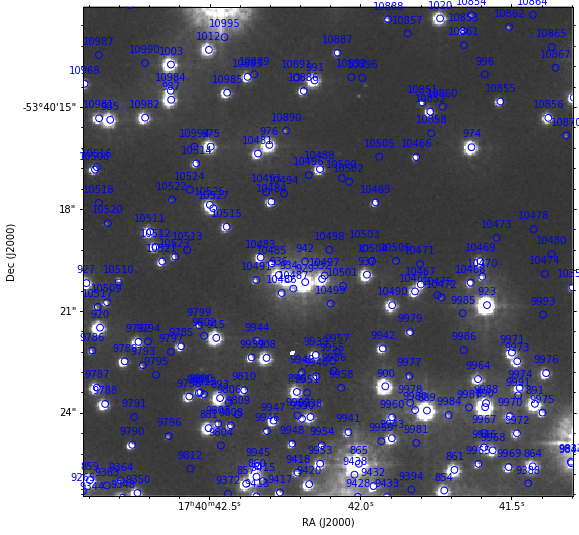

In [9]:
fig = aplpy.FITSFigure('hlsp_hugs_hst_wfc3-uvis_ngc6397_f275w_v1_stack-0752s.fits')
fig.show_grayscale()
fig.recenter(radeg, decdeg, width=0.004, height=0.004)  # degree
fig.show_regions('closestars.reg')

# 